# TestCase 3

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from create_jsonfile import ask_user,read_config,check_config

# ask_user()
config = read_config(configfile="configs/config3.json")

### Configuration has been read from config.json ###
# dimension : 2
# testcase : 3
# version : big
# error_estimations : {'param_num': 2}
# gains : {'n_params': 50}


In [3]:
dimension = config["dimension"]
testcase = config["testcase"]
version = config["version"]  
largenet = False
if "largenet" in version:
    version = "medium" 
    largenet = True
high_degree = 10

In [4]:
assert testcase == 3
check_config(config)

Config file is valid


## Imports + Load network

In [5]:
# export CUDA_VISIBLE_DEVICES=
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
from testcases.utils import create_tree

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
current_dir = os.getcwd()
repo_dir = os.path.dirname(current_dir)
repo_dir = os.path.dirname(repo_dir)
print(repo_dir)
# vérifier que repo_dir finit bien par "code" (à modifier pour l'utilisateur)
assert repo_dir.split("/")[-1] == "code"

/home/u2/lecourtier/Article1/code


In [8]:
testcase_dir = repo_dir + "/results/fenics/test_2D/testcase"+str(testcase)+"/"+version
if version != "new":
    from testcases.networks.test_2D.test_3.test_3_v1 import Run_laplacian2D,Poisson_2D
else:
    from testcases.networks.test_2D.test_3.test_3_v2 import Run_laplacian2D,Poisson_2D
from testcases.problem.problem_2D import TestCase3
problem = TestCase3(version=version)
if version == "medium" and largenet:
    testcase_dir += "_largenet"
from testcases.problem.problem_2D import TestCase3
problem = TestCase3(version=version)

Using device: cpu
torch loaded; device is cpu


>> load network /home/u2/lecourtier/Article1/code/networks/test_2D/test_fe3.pth
network loaded


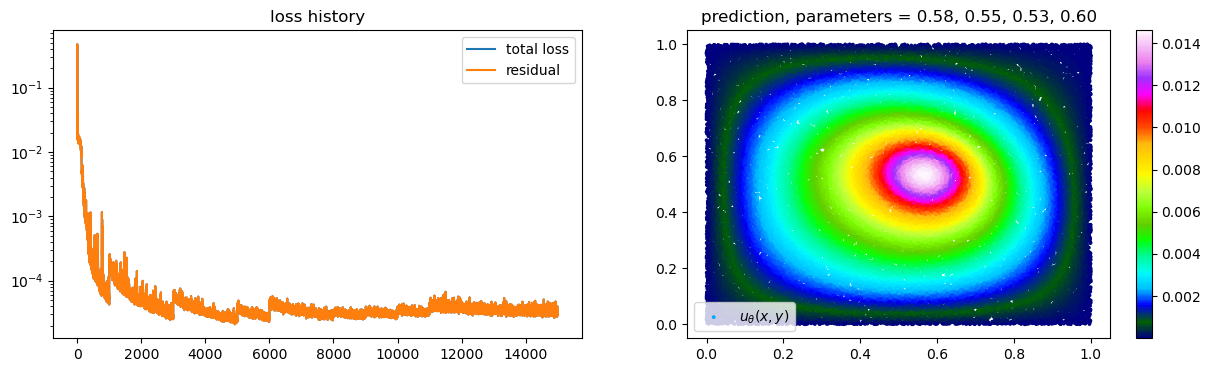

In [9]:
pde = Poisson_2D()
trainer,u_theta = Run_laplacian2D(pde)

## Error estimations

### Imports

In [ ]:
from modfenics.error_estimations.fem import compute_error_estimations_fem_deg,compute_error_estimations_fem_all
from modfenics.error_estimations.add import compute_error_estimations_Corr_deg,compute_error_estimations_Corr_all
from modfenics.error_estimations.mult import compute_error_estimations_Mult_deg,compute_error_estimations_Mult_all

from modfenics.error_estimations.compare import plot_Corr_vs_FEM_alldeg
from modfenics.error_estimations.compare import plot_Mult_vs_FEM_alldeg_allM,plot_Mult_vs_Add_vs_FEM_alldeg_allM
from modfenics.error_estimations.compare import save_tab_alldeg_allM

In [10]:
param_num = config["error_estimations"]["param_num"]     
result_dir = testcase_dir + "/cvg/param"+str(param_num)+"/"
create_tree(result_dir)

### Run FEM

In [13]:
degree = 1
df_FEM, tab_nb_vert_FEM, tab_h_FEM, tab_err_FEM = compute_error_estimations_fem_deg(param_num,problem,degree,high_degree,new_run=False,result_dir=result_dir)

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvgu_ref/u_ref_2.npy
## Read csv file /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param2/FEM_case3_vbig_param2_degree1.csv


/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvgu_ref/u_ref_2.npy
## Read csv file /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param2/FEM_case3_vbig_param2_degree1.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvgu_ref/u_ref_2.npy
## Read csv file /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param2/FEM_case3_vbig_param2_degree2.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvgu_ref/u_ref_2.npy
## Read csv file /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param2/FEM_case3_vbig_param2_degree3.csv


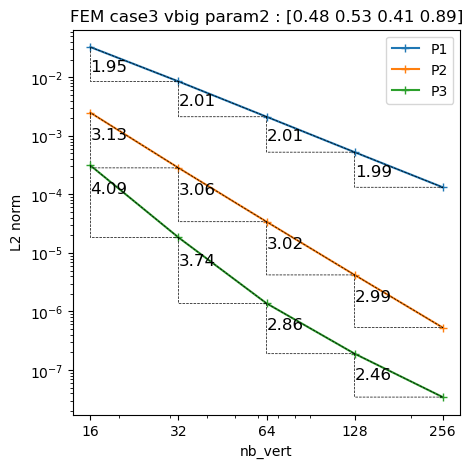

In [14]:
compute_error_estimations_fem_all(param_num,problem,high_degree,new_run=False,result_dir=result_dir,plot_cvg=True)

### Run Add

In [16]:
degree = 1
df_Corr, tab_nb_vert_Corr, tab_h_Corr, tab_err_Corr = compute_error_estimations_Corr_deg(param_num,problem,degree,high_degree,u_theta,new_run=False,result_dir=result_dir)

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param2/u_ref/u_ref_2.npy
## Read csv file /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param2/Corr_case3_vbig_param2_degree1.csv


/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param2/u_ref/u_ref_2.npy
## Read csv file /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param2/Corr_case3_vbig_param2_degree1.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param2/u_ref/u_ref_2.npy
## Read csv file /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param2/Corr_case3_vbig_param2_degree2.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param2/u_ref/u_ref_2.npy
## Read csv file /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param2/Corr_case3_vbig_param2_degree3.csv


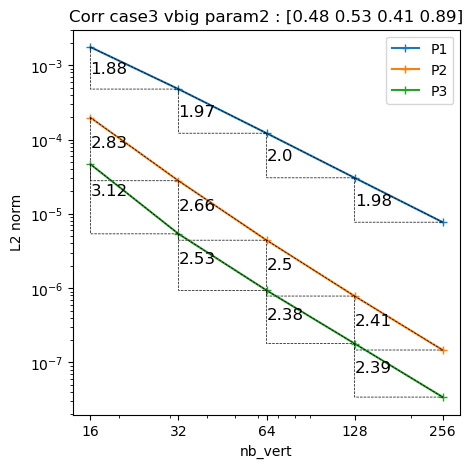

In [17]:
compute_error_estimations_Corr_all(param_num,problem,high_degree,u_theta,new_run=False,result_dir=result_dir,plot_cvg=True)

### Run Mult

In [ ]:
tab_M = [0.0,0.1,1.0,100.0]

In [19]:
degree = 1
for M in tab_M:
    print("#### M = ",M)
    df_Mult, tab_nb_vert_Mult, tab_h_Mult, tab_err_Mult = compute_error_estimations_Mult_deg(param_num,problem,degree,high_degree,u_theta,M=M,new_run=False,result_dir=result_dir)

#### M =  0.0
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param2/u_ref/u_ref_2.npy
## Read csv file /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param2/Mult_case3_vbig_param2_degree1_M0.0.csv
#### M =  0.1
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param2/u_ref/u_ref_2.npy
## Read csv file /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param2/Mult_case3_vbig_param2_degree1_M0.1.csv
#### M =  1.0
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param2/u_ref/u_ref_2.npy
## Read csv file /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param2/Mult_case3_vbig_param2_degree1_M1.0.csv
#### M =  100.0
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param2/u_ref/u_ref_2.npy
## Read csv file /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param2/Mult_case3_vbig_param2_deg

In [20]:
for M in tab_M:
    print("#### M = ",M)
    compute_error_estimations_Mult_all(param_num,problem,high_degree,u_theta,M=M,new_run=False,result_dir=result_dir,plot_cvg=False)

#### M =  0.0
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param2/u_ref/u_ref_2.npy
## Read csv file /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param2/Mult_case3_vbig_param2_degree1_M0.0.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param2/u_ref/u_ref_2.npy
## Read csv file /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param2/Mult_case3_vbig_param2_degree2_M0.0.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param2/u_ref/u_ref_2.npy
## Read csv file /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param2/Mult_case3_vbig_param2_degree3_M0.0.csv
#### M =  0.1
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param2/u_ref/u_ref_2.npy
## Read csv file /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param2/Mult_case3_vbig_param2_degree1_M0.1.csv
/home/u2/lecourt

### Save results

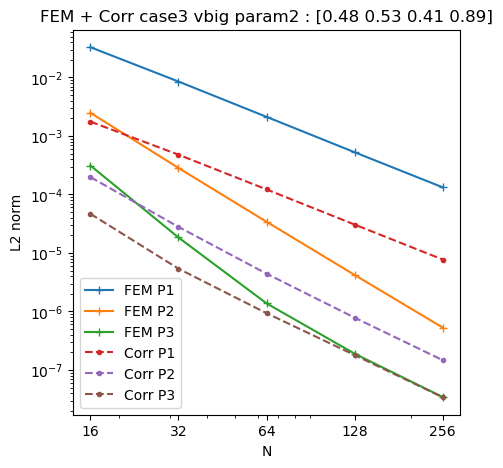

In [22]:
plot_Corr_vs_FEM_alldeg(param_num,problem,result_dir=result_dir)

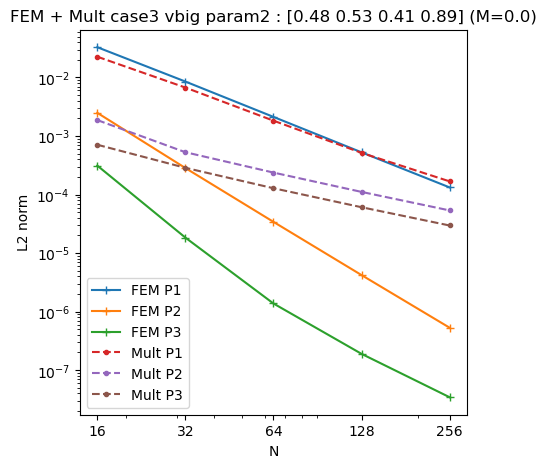

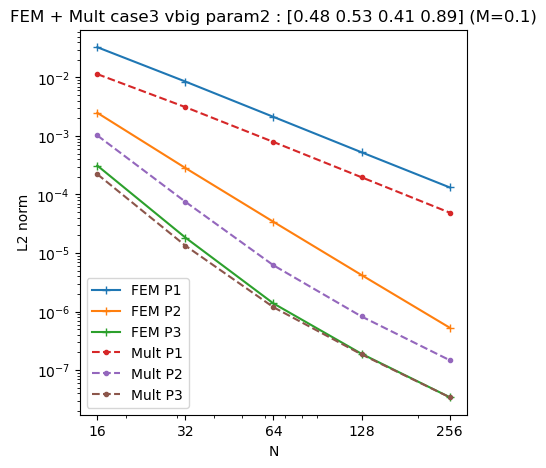

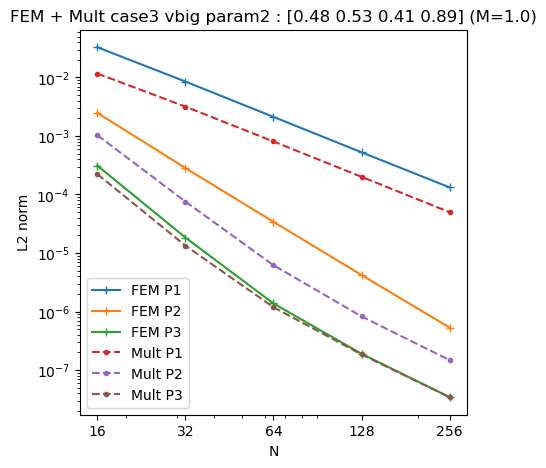

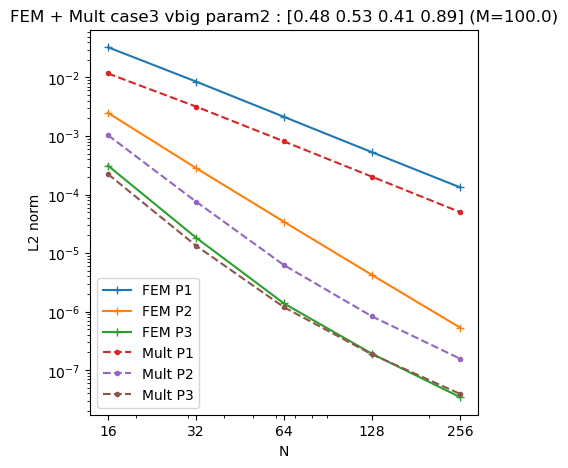

In [23]:
plot_Mult_vs_FEM_alldeg_allM(param_num,problem,tab_M,result_dir=result_dir)

Mult weak P1 M0.0 not found
Mult weak P1 M0.1 not found
Mult weak P1 M1.0 not found
Mult weak P1 M100.0 not found


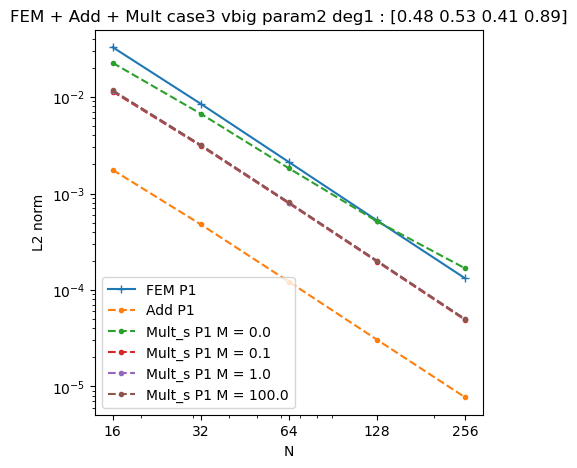

Mult weak P2 M0.0 not found
Mult weak P2 M0.1 not found
Mult weak P2 M1.0 not found
Mult weak P2 M100.0 not found


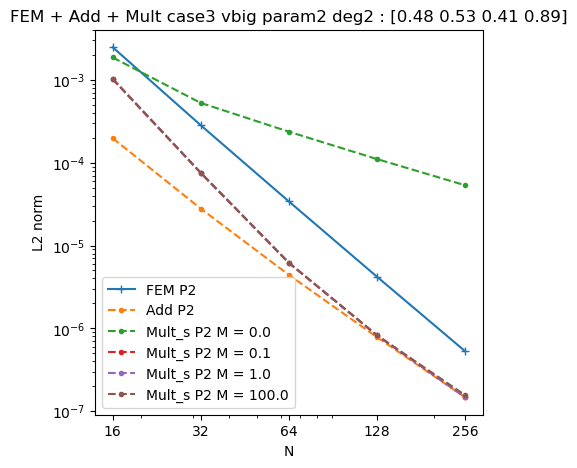

Mult weak P3 M0.0 not found
Mult weak P3 M0.1 not found
Mult weak P3 M1.0 not found
Mult weak P3 M100.0 not found


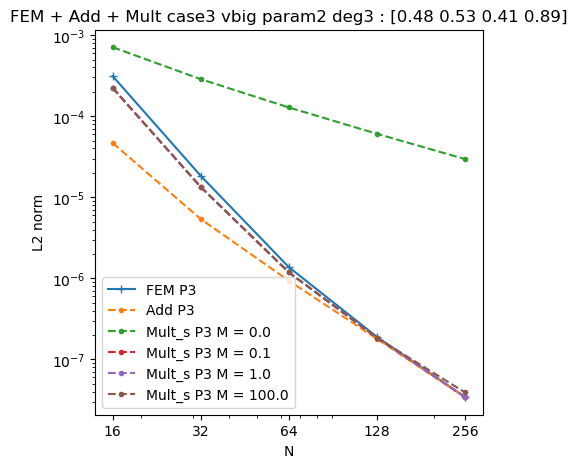

In [24]:
plot_Mult_vs_Add_vs_FEM_alldeg_allM(param_num,problem,tab_M,result_dir=result_dir)

In [25]:
save_tab_alldeg_allM(param_num,problem,tab_M,result_dir=result_dir)

Mult weak P1 M0.0 not found
Mult weak P1 M0.1 not found
Mult weak P1 M1.0 not found
Mult weak P1 M100.0 not found


/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:193: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:197: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')


Mult weak P2 M0.0 not found
Mult weak P2 M0.1 not found
Mult weak P2 M1.0 not found
Mult weak P2 M100.0 not found
Mult weak P3 M0.0 not found
Mult weak P3 M0.1 not found
Mult weak P3 M1.0 not found
Mult weak P3 M100.0 not found


/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:193: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:197: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:193: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:197: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')


## Gains

### Imports

In [18]:
from modfenics.gains.fem import compute_error_fem_deg,compute_error_fem_all
from modfenics.gains.pinns import compute_error_pinns_deg,compute_error_pinns_all
from modfenics.gains.add import compute_error_Corr_deg,compute_error_Corr_all
from modfenics.gains.compare import create_dataframes_deg,create_dataframes_all,save_stats_deg,save_stats_all

In [19]:
n_params = config["gains"]["n_params"]   
result_dir = testcase_dir + "/gains/"
create_tree(result_dir) 

### Run FEM

In [20]:
degree = 1
df_FEM, tab_nb_vert_FEM, tab_h_FEM, tab_err_FEM = compute_error_fem_deg(n_params,problem,degree,high_degree,new_run=False,result_dir=result_dir)

## Run gains with FEM for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.008885765876317436
nb_vert=20
V created with  20  vertices and degree  4  : h = 0.23383594411359887
0 1 

KeyboardInterrupt: 

In [ ]:
# compute_error_fem_all(n_params,problem,high_degree,new_run=False,result_dir=result_dir)

### Run PINNs

In [ ]:
degree = 1
df_PINNs, tab_nb_vert_PINNs, tab_h_PINNs, tab_err_PINNs = compute_error_pinns_deg(n_params,problem,degree,high_degree,u_theta,new_run=False,result_dir=result_dir)

## Read csv file /home/flecourtier/Bureau/Article1/code/results/fenics/test_2D/testcase1/version1/gains/PINNs_errors_case1_v1_degree1.csv


In [ ]:
# compute_error_pinns_all(n_params,problem,high_degree,u_theta,new_run=False,result_dir=result_dir)

### Run Add

In [ ]:
degree = 1
df_Corr, tab_nb_vert_Corr, tab_h_Corr, tab_err_Corr = compute_error_Corr_deg(n_params,problem,degree,high_degree,u_theta,new_run=False,result_dir=result_dir)

## Read csv file /home/flecourtier/Bureau/Article1/code/results/fenics/test_2D/testcase1/version1/gains/Corr_errors_case1_v1_degree1.csv


In [ ]:
# compute_error_Corr_all(n_params,problem,high_degree,u_theta,new_run=False,result_dir=result_dir)

### Compare methods

In [ ]:
degree = 1
df_errors,df_gains = create_dataframes_deg(n_params,problem,degree,result_dir=result_dir)

In [ ]:
# create_dataframes_all(n_params,problem,result_dir=result_dir)

In [ ]:
df_stats_Add = save_stats_deg(n_params,problem,degree,result_dir=result_dir)